# ch1 Machine Learning
- https://github.com/PacktPublishing/Machine-Learning-for-the-Web

<br></br>
## 1 Introduction
Machine-learning example

### 01 데이터 전처리
인터넷 광고 데이터를 활용한 데이터 분석 실습

https://archive.ics.uci.edu/ml/datasets/internet+advertisements

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ad-dataset/ad.data', header=None)

# ? 데이터를 찾아서 삭제한다 (전처리 01)
df = df.replace({'?':np.nan, 
                 ' ?':np.nan,
                 '  ?':np.nan,
                 '   ?':np.nan,
                 '    ?':np.nan,
                 '     ?':np.nan})
df = df.fillna(-1)  # NaN 부분은 -1로 채우기 (전처리 02)

/home/markbaum/Python/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# 마지막 컬럼의 데이터가 'ad.'일 떄 : 1 (True)
adindices = df[df.columns[-1]] == 'ad.'
df.loc[adindices, df.columns[-1]] = 1
# 마지막 컬럼의 데이터가 'nonad.'일 떄 : 0 (False)
nonadindices = df[df.columns[-1]] == 'nonad.'
df.loc[nonadindices, df.columns[-1]] = 0

In [3]:
# dtype 을 변환
df[df.columns[-1]] = df[df.columns[-1]].astype(float)
# 모든 데이터 형식을 'Numeric'으로 일치시킨다
df = df.apply(lambda x:pd.to_numeric(x))  
print(df.head())

   0     1       2     3     4     5     6     7     8     9     ...   1549  \
0   125   125  1.0000     1     0     0     0     0     0     0  ...      0   
1    57   468  8.2105     1     0     0     0     0     0     0  ...      0   
2    33   230  6.9696     1     0     0     0     0     0     0  ...      0   
3    60   468  7.8000     1     0     0     0     0     0     0  ...      0   
4    60   468  7.8000     1     0     0     0     0     0     0  ...      0   

   1550  1551  1552  1553  1554  1555  1556  1557  1558  
0     0     0     0     0     0     0     0     0   1.0  
1     0     0     0     0     0     0     0     0   1.0  
2     0     0     0     0     0     0     0     0   1.0  
3     0     0     0     0     0     0     0     0   1.0  
4     0     0     0     0     0     0     0     0   1.0  

[5 rows x 1559 columns]


In [4]:
# 참고 1 : 문자등을 숫자로 변환
# pd.to_numeric('string') : String to Float
a = "100"
pd.to_numeric(a)

100

In [5]:
# 참고 2 : 데이터 타입의 변환
# .astype : adjusted by runnung System (int 64)
x = np.arange(5)
print(x.dtype) 
x.astype(np.int16)

int64


array([0, 1, 2, 3, 4], dtype=int16)

### 02 SVM 알고리즘의 적용 1
Train | Test 모델 전처리 - Train 80%, Test 20%

In [6]:
# https://wikidocs.net/79
# Field는 고정된 상태에서, index 를 기준으로 뒤섞는다
dataset = df.values[:,:]
np.random.shuffle(dataset)
print(dataset.shape)

# data : 특징벡터
data = dataset[:,:-1]
# 80% index 추출
train_rows = int(len(data)* .8)  
train = data[ : train_rows ,  :]

(3279, 1559)


In [7]:
# labels : 목표변수 벡터
labels = dataset[:,-1].astype(float)

# 80%를 Train 데이터로 묶는다
train_labels = labels[ : train_rows]

# 20%를 Test 데이터로 묶는다
test = data[ train_rows :,  :]
test_labels = labels[ train_rows :]

### 02 SVM 알고리즘의 적용 2
SVM 모델 훈련

In [8]:
from sklearn.svm import SVC
clf = SVC(gamma=0.001 ,C=100.)  # SVM 모델을 선언
clf.fit(train, train_labels)    # 훈련 데이터로 모델생성 : clf.fit(train_파라미터, train_Target)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Test 모델로 정확도 확인
print('score: {:.4}'.format(clf.score(test, test_labels)))

score: 0.9604


In [10]:
# SVM 분류결과 
# 예측결과와 실제결과(ad/ non_ad) 96% 일치를 보여준다

<br></br>
## 2 Numpy
Using NumPy

### 01 Numpy 의 속도비교
Using NumPy

In [11]:
import time; import numpy as np
# For 문으로 연산한 한 경우
def sum_trad():
    start = time.time()
    X, Y, Z = range(10000000), range(10000000), []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])
    return time.time() - start

# Numpy로 연산한 한 경우
def sum_numpy():
    start = time.time()
    X = np.arange(10000000) ; Y = np.arange(10000000) 
    Z = X + Y
    return time.time() - start

print('Using For loop :',round(sum_trad(),7),
      '\nUsing numpy    :',round(sum_numpy(),7),
     '\nNumpy is {:.5} Faster '.format(sum_trad()/sum_numpy()))

Using For loop : 2.8226082 
Using numpy    : 0.0432069 
Numpy is 66.649 Faster 


### 02 배열의 생성 
Numpy.ndarray

In [12]:
# Array Basic function
# array 생성
arr = np.array([2, 6, 5, 9], float)
print (type(arr), arr)

# .tolist()  : ndarray to [ List ]
print (arr.tolist())

# arr.copy() : ndarray 객체를 복사
arr2 = arr.copy()
arr2[0] = 0
print ("arr (original) : ", arr, "\narr2 (copied)  :", arr2)

# ndarray.fill(객체) : 모든 Index 에 '객체'로 통일해서 채운다
arr.fill(1)
arr

<class 'numpy.ndarray'> [ 2.  6.  5.  9.]
[2.0, 6.0, 5.0, 9.0]
arr (original) :  [ 2.  6.  5.  9.] 
arr2 (copied)  : [ 0.  6.  5.  9.]


array([ 1.,  1.,  1.,  1.])

In [13]:
# Random : 랜덤 배열생성
print (np.random.permutation(10))

# np.random.normal(평균, 표준편차, 배열요소 갯수)
print (np.random.normal(5,1,4)) 

# np.random.random( int )  : 0,1 의 정규분포 자료를 생성
print (np.random.random(5))

[8 7 2 5 3 1 4 6 0 9]
[ 5.30370546  5.73611795  6.03221137  3.21679787]
[ 0.72599625  0.55159406  0.96310976  0.40490117  0.80964018]


In [14]:
# 단위행렬 (0, 1)
# 0,1 의 단위행렬
print (np.identity(5, dtype=float))

# 0,1 단위행렬 중, k 번쨰 대각이 1인 행렬
print (np.eye(3, k=0, dtype=float))
print (np.ones((2,3), dtype=float))
print (np.zeros((2,3), dtype=int))
arr = np.array([[13, 32, 31], [64, 25, 76]], float)
print (np.zeros_like(arr))
print (np.ones_like(arr))

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[0 0 0]
 [0 0 0]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [15]:
# Sorting by index
print (np.unique(arr))
print (np.sort(arr))
print (np.argsort(arr))

[ 13.  25.  31.  32.  64.  76.]
[[ 13.  31.  32.]
 [ 25.  64.  76.]]
[[0 2 1]
 [1 0 2]]


In [16]:
# [List] 객체를 임의로 섞는다.
np.random.shuffle(arr)
print(arr)

[[ 64.  25.  76.]
 [ 13.  32.  31.]]


In [17]:
# 배열의 비교
arr_1 = np.array([1,5,2])
np.array_equal(arr, arr_1 )

False

### 03 Matrix
Numpy Matrix

In [18]:
# 1차원 배열로 Matrix 생성
arr1 = np.array([1,3,2])
arr2 = np.array([3,4,6])
print (np.vstack([arr1,arr2]))

[[1 3 2]
 [3 4 6]]


In [19]:
# random 데이터로 배열 생성하기
print (np.random.rand(2,3))

[[ 0.47407149  0.49686361  0.06818334]
 [ 0.71154402  0.02170203  0.78007338]]


In [20]:
## 다변량 정규분포
# np.random.multivariate_normal([평균벡터], [[ 공분산 행렬 ]], size = [index, columns] )
print (np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[5,]))

[[  7.60629855  -2.68131233]
 [  5.5869916    2.60954412]
 [ 12.29681599  -0.4112696 ]
 [  9.85553694  -1.92687039]
 [  6.94089902  -1.47547667]]


In [21]:
arr = np.array([[10, 29, 23], [24, 25, 46]], float)
print (arr.flatten())
print (arr.shape)
print (arr.dtype)

[ 10.  29.  23.  24.  25.  46.]
(2, 3)
float64


In [22]:
matrix = np.array([[ 4., 5., 6.], [2, 3, 6]], float)
matrix.astype(np.int32)

array([[4, 5, 6],
       [2, 3, 6]], dtype=int32)

In [23]:
len(matrix)

2

In [24]:
# Boolean()
print (2 in matrix)
print (0 in matrix)

True
False


In [25]:
# 데이터 Formant 을 지정
arr = np.array(range(8), float) ; arr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [26]:
# ndarray 차원을 지정
arr = arr.reshape((4,2))
print(arr.shape, '\n',   arr)

(4, 2) 
 [[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]
 [ 6.  7.]]


In [27]:
# X , Y 축의 변경 01
arr = np.array(range(6), float).reshape((2, 3))
print(arr)
arr.transpose()

[[ 0.  1.  2.]
 [ 3.  4.  5.]]


array([[ 0.,  3.],
       [ 1.,  4.],
       [ 2.,  5.]])

In [28]:
# X , Y 축의 변경 02
matrix = np.arange(15).reshape((3, 5))
print (matrix)
matrix .T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [29]:
# Broad Casting (차원이 다른 Matrix의 연산을 자동으로 조정)
# np.newaxis ( 새로운 차원을 상수로 지정 )
arr = np.array([14, 32, 13], float)
print (arr)
print (arr[:,np.newaxis])
print (arr[:,np.newaxis].shape)
print (arr[np.newaxis,:])
print (arr[np.newaxis,:].shape)

[ 14.  32.  13.]
[[ 14.]
 [ 32.]
 [ 13.]]
(3, 1)
[[ 14.  32.  13.]]
(1, 3)


In [30]:
arr1 = np.array([10,22], float)
arr2 = np.array([31,43,54,61], float)
arr3 = np.array([71,82,29], float)
np.concatenate((arr1, arr2, arr3))

array([ 10.,  22.,  31.,  43.,  54.,  61.,  71.,  82.,  29.])

In [31]:
# 배열의 결합 (Merge the Matrix)
arr1 = np.array([[11, 12], [32, 42]], float)
arr2 = np.array([[54, 26], [27,28]], float)
print (np.concatenate((arr1,arr2)))
print (np.concatenate((arr1,arr2), axis=0))
print (np.concatenate((arr1,arr2), axis=1))

[[ 11.  12.]
 [ 32.  42.]
 [ 54.  26.]
 [ 27.  28.]]
[[ 11.  12.]
 [ 32.  42.]
 [ 54.  26.]
 [ 27.  28.]]
[[ 11.  12.  54.  26.]
 [ 32.  42.  27.  28.]]


In [32]:
arr = np.array([10, 20, 30], float)
str = arr.tostring()
print (str)
np.fromstring(str)

b'\x00\x00\x00\x00\x00\x00$@\x00\x00\x00\x00\x00\x004@\x00\x00\x00\x00\x00\x00>@'


array([ 10.,  20.,  30.])

In [33]:
# array operations
# 동일한 index 간의 연산 (배열연산 X ) 
arr1 = np.array([1,2,3], float)
arr2 = np.array([1,2,3], float)
print (arr1+arr2)

[ 2.  4.  6.]


In [34]:
print (arr1 - arr2)
print (arr1 * arr2)
print (arr2 / arr1)
print (arr1 % arr2)
print (arr2 ** arr1)

[ 0.  0.  0.]
[ 1.  4.  9.]
[ 1.  1.  1.]
[ 0.  0.  0.]
[  1.   4.  27.]


In [35]:
# ValueError: operands could not be broadcast together with shapes (3,) (2,) 
# arr1 = np.array([1,2,3], float)
# arr2 = np.array([1,2], float)
# print (arr1 + arr2)  # 브로드캐스팅 에러가 발생
arr1 = np.array([[1, 2], [3, 4], [5, 6]], float)
arr2 = np.array([1, 2], float)
print (arr1)
print (arr2) 
print (arr1 + arr2)  # 자동으로 큰 차원의 배열에 맞춰서 확장

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]
[ 1.  2.]
[[ 2.  4.]
 [ 4.  6.]
 [ 6.  8.]]


In [36]:
arr1 = np.zeros((2,2), float)
arr2 = np.array([1., 2.], float)
print (arr1)
print (arr2)
print (arr1 + arr2)

[[ 0.  0.]
 [ 0.  0.]]
[ 1.  2.]
[[ 1.  2.]
 [ 1.  2.]]


### 04 Broadcasting
Numpy Matrix

In [37]:
# arr2 의 index 에 차원추가
print (arr1 + arr2[np.newaxis,:])

[[ 1.  2.]
 [ 1.  2.]]


In [38]:
# arr2 의 index 에 차원추가
print (arr1 + arr2[:,np.newaxis])

[[ 1.  1.]
 [ 2.  2.]]


In [39]:
arr = np.array([[1, 2], [5, 9]], float)
print (arr >= 7)
print (arr[arr >= 7])

[[False False]
 [False  True]]
[ 9.]


In [40]:
# np.logical_and( 논리 합 )
arr[np.logical_and(arr > 5, arr < 11)]

array([ 9.])

In [41]:
# Feather 01
arr1 = np.array([1, 4, 5, 9], float) # Source
arr2 = np.array([0, 1, 1, 3, 1, 1, 1], int) # Index Num
arr1[arr2]

array([ 1.,  4.,  4.,  9.,  4.,  4.,  4.])

In [42]:
# Feather 02
arr = np.array([1, 4, 5, 9], float)
arr[[0, 1, 1, 3, 1]]

array([ 1.,  4.,  4.,  9.,  4.])

In [43]:
arr1 = np.array([[1, 2], [5, 13]], float)
arr2 = np.array([1, 0, 0, 1], int)
arr3 = np.array([1, 1, 0, 1], int)
arr1[arr2,arr3]

array([ 13.,   2.,   1.,  13.])

In [44]:
arr1 = np.array([7, 6, 6, 9], float)
arr2 = np.array([1, 0, 1, 3, 3, 1], int)
arr1.take(arr2)

array([ 6.,  7.,  6.,  9.,  9.,  6.])

In [45]:
arr1 = np.array([[10, 21], [62, 33]], float)
arr2 = np.array([0, 0, 1], int)
arr1.take(arr2, axis=0)
print (arr1.take(arr2, axis=1))

[[ 10.  10.  21.]
 [ 62.  62.  33.]]


In [46]:
arr1 = np.array([2, 1, 6, 2, 1, 9], float)
arr2 = np.array([3, 10, 2], float)
arr1.put([1, 4], arr2)
print (arr1)

[  2.   3.   6.   2.  10.   9.]


In [47]:
arr1 = np.array([[11,22], [23,14]], float)
arr2 = np.array([[25,30], [13,33]], float)
print (arr1*arr2)

[[ 275.  660.]
 [ 299.  462.]]


### 05 선형대수
linear algebra operations

벡터의 내적/ 외적 https://www.youtube.com/embed/ce0YlZH47S0

In [48]:
# 행렬
X = np.arange(15).reshape((3, 5)); X 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [49]:
# 전치행렬
X.T 

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [50]:
#벡터의 내적 : 행 벡터 X 열 벡터
# X^T X
np.dot(X .T, X)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [51]:
arr1 = np.array([12, 43, 10], float)
arr2 = np.array([21, 42, 14], float)
np.outer(arr1, arr2)

array([[  252.,   504.,   168.],
       [  903.,  1806.,   602.],
       [  210.,   420.,   140.]])

In [52]:
# 내적의 곱 (Dot Product)
np.inner(arr1, arr2)

2198.0

In [53]:
# 외적의 곱 (Cross Product)
np.cross(arr1, arr2)

array([ 182.,   42., -399.])

In [54]:
matrix = np.array([[74, 22, 10], [92, 31, 17], [21, 22, 12]], float)
np.linalg.det(matrix)

-2852.0000000000032

In [55]:
# np.linalg.inv() 역행렬
inv_matrix = np.linalg.inv(matrix)
inv_matrix

array([[ 0.00070126,  0.01542777, -0.02244039],
       [ 0.26192146, -0.23772791,  0.11851332],
       [-0.48141655,  0.4088359 , -0.09467041]])

In [56]:
np.dot(inv_matrix,matrix)

array([[  1.00000000e+00,   1.66533454e-16,   5.55111512e-17],
       [ -2.66453526e-15,   1.00000000e+00,   2.22044605e-16],
       [ -2.44249065e-15,   4.44089210e-16,   1.00000000e+00]])

In [57]:
vals, vecs = np.linalg.eig(matrix)
print("고유 값: \n" ,vals)
print("고유 벡터 : \n" ,vecs) 

고유 값: 
 [ 107.99587441   11.33411853   -2.32999294]
고유 벡터 : 
 [[-0.57891525 -0.21517959  0.06319955]
 [-0.75804695  0.17632618 -0.58635713]
 [-0.30036971  0.96052424  0.80758352]]


In [58]:
#Statistics and mathematical functions
arr = np.random.rand(8, 4)
print('Mean .mean     {:.6}'.format(arr.mean()))
print('Mean np.mean() {:.6}'.format(np.mean(arr)))
print('Sum  .sum      {:.6}'.format(arr.sum()))

Mean .mean     0.489661
Mean np.mean() 0.489661
Sum  .sum      15.6691


<br></br>
## 3 Pandas

### 01 Introduction
pandas

In [59]:
import pandas as pd
import numpy as np
# Series Data
obj = pd.Series([3,5,-2,1])
obj

0    3
1    5
2   -2
3    1
dtype: int64

In [60]:
obj.values

array([ 3,  5, -2,  1])

In [61]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [62]:
obj *2

0     6
1    10
2    -4
3     2
dtype: int64

In [63]:
obj[obj>2]

0    3
1    5
dtype: int64

In [64]:
# Series Data ( added Index by {dict})
data = {'a': 30, 'b': 70, 'c': 160, 'd': 5}
obj = pd.Series(data)
obj

a     30
b     70
c    160
d      5
dtype: int64

In [65]:
# Series Data ( added Index by  ,index = )
index = ['a','b','c','d','g']
obj = pd.Series(data, index=index)
obj

a     30.0
b     70.0
c    160.0
d      5.0
g      NaN
dtype: float64

In [66]:
pd.isnull(obj)

a    False
b    False
c    False
d    False
g     True
dtype: bool

In [67]:
pd.notnull(obj)

a     True
b     True
c     True
d     True
g    False
dtype: bool

### 02 CSV 파일 다루기
http://archive.ics.uci.edu/ml/dataset/Internet+Advertisements

In [68]:
# pd.read_csv()
data = pd.read_csv("./data/ad-dataset/ad.data", header=None)
# data = pd.read_csv(".", delimiter= , header=)
print('Shape   :'  , data.shape)
print('Columns :',data.columns)
# print(data.dtypes.head())
data.describe()

/home/markbaum/Python/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape   : (3279, 1559)
Columns : Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558],
           dtype='int64', length=1559)


,4,5,6,7,8,9,10,11,12,13,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 03 DataFrame 가공 1
Slicing

In [69]:
data[1].head(3)

0     125
1     468
2     230
Name: 1, dtype: object

In [70]:
# Index 기준으로 slicing
data[1:3]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [71]:
# Column 기준으로 slicing
data[[1,3]][:4]

,1,3
0,125,1
1,468,1
2,230,1
3,468,1


In [72]:
# Index 값을 입력
data.ix[:3]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [73]:
data.loc[:3]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [74]:
# Index 를 slicing
data.iloc[:3]

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [75]:
# 특정 셀의 값을 변환
data.ix[3,1] = 0
# 특정 컬럼을 하나의 값으로 입력
data[1547] = 0

### 03 DataFrame 가공 2
Editing Index

In [76]:
# Pandas.ix[] 로 인덱스 입력
# data.ix[0] : 0번 Index를  Random한 값으로 입력 + ['ad.']  마지막 컬럼은 String
import random
data.ix[0] = [random.randint(0,1)  for r in range(1558)] + ['ad.']

In [77]:
# Pandas.series() 로 인덱스 입력
row = [random.randint(0,1)   for r in range(1558)] + ['ad.']
data = data.append(pd.Series(row, index = data.columns), ignore_index=True)

In [78]:
# Pandas.loc[ 마지막 index ] = value    로 인덱스 데이터 입력
data.loc[len(data)] = row

### 04 DataFrame 가공 3
Editing column

In [79]:
# 새로운 Column 삽입
data['newcolumn'] = 'test value'
data.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
              1550,        1551,        1552,        1553,        1554,
              1555,        1556,        1557,        1558, 'newcolumn'],
      dtype='object', length=1560)

In [80]:
data['newcolumn'].head(3)

0    test value
1    test value
2    test value
Name: newcolumn, dtype: object

In [81]:
data = data.drop('newcolumn', 1)
data.columns

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558],
      dtype='object', length=1559)

In [82]:
# 데이터의 중복 여부를 확인
data.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [83]:
# 특정 index 에서 고유한 값만 출력
data[300].drop_duplicates()

0      0
524    1
Name: 300, dtype: int64

In [84]:
data[1558].drop_duplicates().tolist()

['ad.', 'nonad.']

### 05 DataFrame 의 병합
pandas

In [85]:
len(data)

3281

In [86]:
data1 = pd.DataFrame(columns= [i  for i in range(1559)])
data1.loc[len(data1)] = [ random.randint(0,1)  for r in range(1558)] + [1]
data1.loc[len(data1)] = [ random.randint(0,1)  for r in range(1558)] + [1]

# data 와 data1의 병합
datatot = pd.concat([data[:], data1[:]])
len(datatot)

3283

<br></br>
## 4 Matplotlib

### 01 line plot
first example

In [87]:
%matplotlib inline 
import matplotlib.pyplot as plt

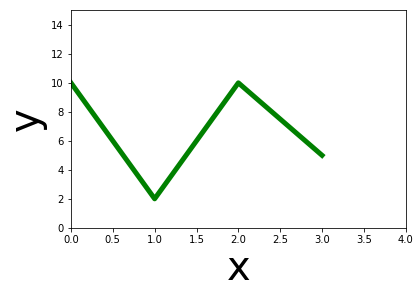

In [88]:
# [y1, y2, y3, y4]   cf) X 는 1,2,3,4 자동으로 인덱싱
plt.plot([10,2,10,5],color='green',label='line 1', linewidth=5) 
plt.axis([0,4, 0,15])
plt.ylabel('y',fontsize=40)
plt.xlabel('x',fontsize=40)
# Graph 의  [ x축 범위 , y축 범위 ]
plt.show()

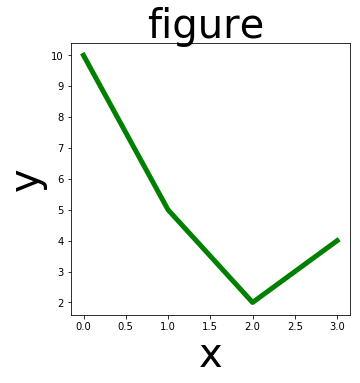

In [89]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('figure',fontsize=40)
# ax = 1번그림 1 x 1 
ax = fig.add_subplot(111)        
ax.plot([10,5,2,4],color='green',label='line 1', linewidth=5)
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
#fig.savefig('./img/figure.png')

### 02 Multiple lines plot
second example

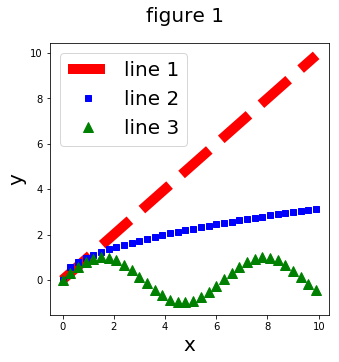

In [90]:
import numpy as np
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
r = np.arange(0., 10., 0.3)
p1, = ax.plot(r, r, 'r--',label='line 1', linewidth=10)        # line Graph
p2, = ax.plot(r, r**0.5, 'bs',label='line 2', linewidth=10)    # log Graph
p3, = ax.plot(r,np.sin(r),'g^', label='line 3', markersize=10) # SIN() Graph
handles, labels = ax.get_legend_handles_labels()   # 객체의 핸들과 레이어 목록을 반환 
ax.legend(handles, labels,fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
fig.suptitle('figure 1',fontsize=20)
#fig.savefig('./img.figure_multiplelines.png')

### 03 scatter plot with random points
matplotlib

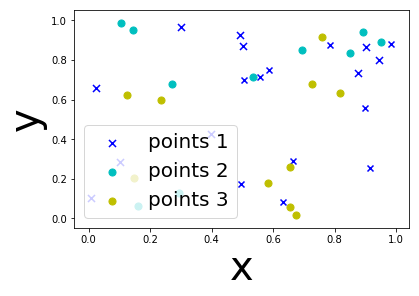

In [91]:
colors = ['b', 'c', 'y', 'm', 'r']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[0])
p1 = ax.scatter(np.random.random(10), np.random.random(10), marker='x', color=colors[0],s=50)
p2 = ax.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[1],s=50)
p3 = ax.scatter(np.random.random(10), np.random.random(10), marker='o', color=colors[2],s=50)
ax.legend((p1,p2,p3),('points 1','points 2','points 3'),fontsize=20)
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
#fig.savefig('./img/figure_scatterplot.png')